# Models : 3D parameters

The aim of this notebook is to indicate how to read the 3D data from the large-mesh french model called 'ARPEGE' (spatial resolution of 0.1°).

Per geographic zone ('NW' for North-West of France and 'SE' for South-East of France) and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step can be different according to days : it is 1h from 0h to 12h and can sometimes rise to 3h after 12h (from 12h to 24h of range forecasts).

Finally, the 3D data are stored in 2 different GRIB files, according to the vertical levels:
<ul>
    <li>height levels ('height' in the file name) : 20, 100, 500, 875, 1375, 2000 and 3000 m </li>
    <li>isobar levels ('isobar' in the file name) : 1000, 950, 925, 850, 700, 600 and 500 hPa</li>
</ul> 

The parameters are as follows:
<ul>
    <li>height levels ('height' in the file name) : pressure (in Pa) </li>
    <li>isobar levels ('isobar' in the file name) : temperature (in K), pseudo-adiabatic potential temperature (in K), relative humidity (in %), wind speed (in m.s<sup>-1</sup>), wind direction (in °), U and V wind components (in m.s<sup>-1</sup>), vertical velocity (in Pa.<sup>-1</sup>), geopotential (in m<sup>2</sup>.s<sup>-2</sup>).</li>
</ul> 

Remark 1: to open easily a GRIB file with Python, it is necessary to install the packages (in this order) *eccodes*, *cfgrib* then *xarray* with the following commands (if you use the Anaconda environment):
<ul>
    <li>1:conda install -c conda-forge eccodes</li>
    <li>2:conda install -c conda-forge cfgrib</li>
    <li>3:conda install -c anaconda xarray</li>    
</ul>

When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

Remark 2: the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*</li>

In [4]:
#####TO DO ONLY IF YOU ARE A PROBLEM WITH THE LIBRARY BASEMAP OR XARRAY###
import os
#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE BASEMAP LIBRARY -> PROBLEM OF TYPE "KeyError : 'PROJ_LIB'" (cf next cell)#####
#indicate the path to the file 'epsg'
#(located normally into the directory /Library/share of Anaconda) via the next commands : 
os.environ["PROJ_LIB"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share"   #-> type example of path

#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE ECCODES LIBRARY -> PROBLEM OF TYPE "ECCODES ERROR   :  Unable to find boot.def,
#The environment variable ECCODES_DEFINITION_PATH is defined but incorrect"
#Solution : indicate the path to the file 'boot.def'
#(located normally into the directory Library/share/eccodes/definitions of Anaconda)
os.environ["ECCODES_DEFINITION_PATH"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share/eccodes/definitions"   #-> type example of path

In [5]:
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm 
from coordinates_and_projection import *

In [6]:
####Cell containing the modifiable fields######
zone = 'NW'               #geographic zone (NW or SE)
level = 'height'              #vertical level (height or isobar)
date = '20180520000000'   #run date (at format YYYYMMDDHHMMSS) 
param = 'pres'           #parameter name in the file (cf cell below to know the parameter names -> overview of data)
time_step = 0                #index for the studied time step (cf plot example below)
level_step = 2               #index for the studied level step (cf plot example below)

In [7]:
year = date[0:4]
month = date[4:6]
day =  date[6:8]
path = 'D:/prez_opendata/data/output/samples/models/'+date[0:6]+'/ARPEGE/'+zone+'/'+year+'/'+month+'/'+day+'/'   #path to the data
file = 'arpege_3D_'+level+'_'+zone+'_'+date+'.grib'      #file name 

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

data = xr.open_dataset(path+file, engine='cfgrib')   #data loading

Overview of the data -> print(data) to get the metadata : 

In [8]:
print(data)

<xarray.Dataset>
Dimensions:            (heightAboveGround: 7, latitude: 58, longitude: 80, step: 17)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
  * heightAboveGround  (heightAboveGround) int32 20 100 500 875 1375 2000 3000
  * latitude           (latitude) float64 51.9 51.8 51.7 51.6 ... 46.4 46.3 46.2
  * longitude          (longitude) float64 -5.842 -5.742 -5.642 ... 1.958 2.058
    valid_time         (step) datetime64[ns] ...
Data variables:
    pres               (step, heightAboveGround, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2019-10-04T16:37:23 GRIB to CDM+CF via cfgrib-0....


Get the information about coordinates (latitude and longitude):

In [9]:
coord = 'longitude'
data[coord]
vals = data[coord].values  #get the values
print(data[coord])

<xarray.DataArray 'longitude' (longitude: 80)>
array([-5.842, -5.742, -5.642, -5.542, -5.442, -5.342, -5.242, -5.142, -5.042,
       -4.942, -4.842, -4.742, -4.642, -4.542, -4.442, -4.342, -4.242, -4.142,
       -4.042, -3.942, -3.842, -3.742, -3.642, -3.542, -3.442, -3.342, -3.242,
       -3.142, -3.042, -2.942, -2.842, -2.742, -2.642, -2.542, -2.442, -2.342,
       -2.242, -2.142, -2.042, -1.942, -1.842, -1.742, -1.642, -1.542, -1.442,
       -1.342, -1.242, -1.142, -1.042, -0.942, -0.842, -0.742, -0.642, -0.542,
       -0.442, -0.342, -0.242, -0.142, -0.042,  0.058,  0.158,  0.258,  0.358,
        0.458,  0.558,  0.658,  0.758,  0.858,  0.958,  1.058,  1.158,  1.258,
        1.358,  1.458,  1.558,  1.658,  1.758,  1.858,  1.958,  2.058])
Coordinates:
    time       datetime64[ns] ...
  * longitude  (longitude) float64 -5.842 -5.742 -5.642 ... 1.858 1.958 2.058
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [10]:
print(data[coord].units)  #example to get the information from attributes

degrees_east


Get the information about the run date and the different range forecasts:

In [11]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2018-05-20T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-05-20
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [12]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates

<xarray.DataArray 'valid_time' (step: 17)>
array(['2018-05-20T00:00:00.000000000', '2018-05-20T01:00:00.000000000',
       '2018-05-20T02:00:00.000000000', '2018-05-20T03:00:00.000000000',
       '2018-05-20T04:00:00.000000000', '2018-05-20T05:00:00.000000000',
       '2018-05-20T06:00:00.000000000', '2018-05-20T07:00:00.000000000',
       '2018-05-20T08:00:00.000000000', '2018-05-20T09:00:00.000000000',
       '2018-05-20T10:00:00.000000000', '2018-05-20T11:00:00.000000000',
       '2018-05-20T12:00:00.000000000', '2018-05-20T15:00:00.000000000',
       '2018-05-20T18:00:00.000000000', '2018-05-20T21:00:00.000000000',
       '2018-05-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    time        datetime64[ns] 2018-05-20
  * step        (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 00:00:00
    valid_time  (step) datetime64[ns] 2018-05-20 ... 2018-05-21
Attributes:
    standard_name:  time
    long_name:      time

Get the information about the vertical level:

In [13]:
if (level =='isobar'):
    level_name = 'isobaricInhPa'
else:
    level_name = 'heightAboveGround'
info_level = data[level_name]
level_vals=info_level.values     #get the values
info_level

<xarray.DataArray 'heightAboveGround' (heightAboveGround: 7)>
array([  20,  100,  500,  875, 1375, 2000, 3000])
Coordinates:
    time               datetime64[ns] 2018-05-20
  * heightAboveGround  (heightAboveGround) int32 20 100 500 875 1375 2000 3000
Attributes:
    long_name:      height above the surface
    units:          m
    positive:       up
    standard_name:  height

Get the information about one parameter: 
the parameter names in the GRIB file are indicated in the field 'Data variables' (cf print(data) above)

In [14]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 'pres' (step: 17, heightAboveGround: 7, latitude: 58, longitude: 80)>
array([[[[101930.39 , ..., 102191.47 ],
         ...,
         [101885.07 , ...,  96379.55 ]],

        ...,

        [[ 70986.44 , ...,  70944.32 ],
         ...,
         [ 71009.625, ...,  66850.086]]],


       ...,


       [[[101567.03 , ..., 101673.69 ],
         ...,
         [101241.87 , ...,  95849.87 ]],

        ...,

        [[ 70677.86 , ...,  70842.65 ],
         ...,
         [ 70562.26 , ...,  66615.72 ]]]], dtype=float32)
Coordinates:
    time               datetime64[ns] 2018-05-20
  * step               (step) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
  * heightAboveGround  (heightAboveGround) int32 20 100 500 875 1375 2000 3000
  * latitude           (latitude) float64 51.9 51.8 51.7 51.6 ... 46.4 46.3 46.2
  * longitude          (longitude) float64 -5.842 -5.742 -5.642 ... 1.958 2.058
    valid_time         (step) datetime64[ns] 2018-05-20 ... 2018-05-21
Attributes:
    GRIB

The structure of the parameter (4 dimensions):
<ul>
    <li>number of steps or range forecasts</li>
    <li>number of vertical levels</li>
    <li>number of points in latitude</li>
    <li>number of points in longitude</li>   
</ul>

In [15]:
d_vals.shape

(17, 7, 58, 80)

Plot the parameter values for 1 given time step:

<IPython.core.display.Javascript object>


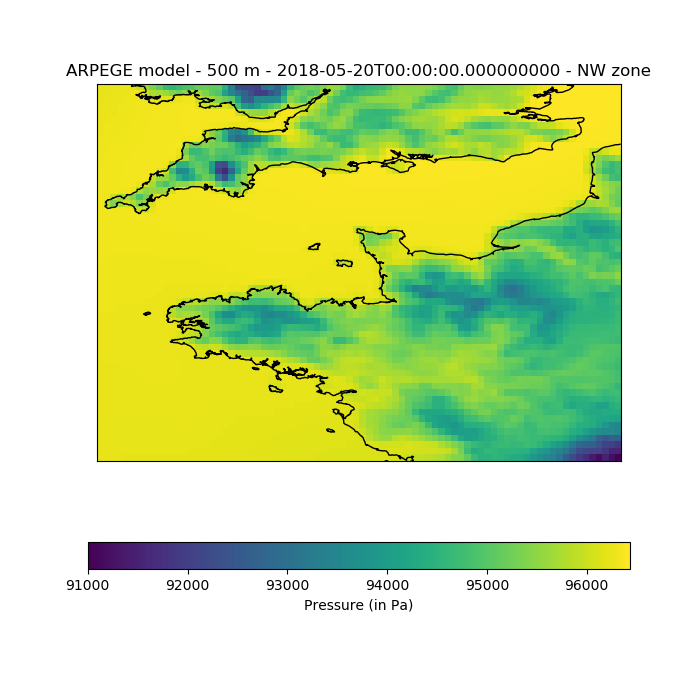

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


In [16]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(d_vals[time_step,level_step,:,:], interpolation='none', origin='upper')
plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title("ARPEGE model - "+ str(level_vals[level_step])+ " "+ info_level.units + " - "  +str(d['valid_time'].values[time_step])+" - " +zone + " zone")
plt.show()